In [1]:
import numpy as np
import scipy.ndimage
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import os
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest' 
matplotlib.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [2]:
#telap_dir = os.path.abspath('../Apertures/JPL/offset_masks')

In [3]:
M = 32 # array quadrant width of final gray-pixel approximation
binfac = 100 # bin factor between large binary array and gray-pixel approximation
L = 2*M*binfac # number of points across large binary array
dx = 1./L # step size between samples of large binary array 

In [4]:
xs = np.linspace(-L/2 + 0.5, L/2 - 0.5, L)/L

In [5]:
xs

array([-0.49992188, -0.49976562, -0.49960938, ...,  0.49960938,
        0.49976562,  0.49992188])

In [6]:
xs.shape

(6400,)

In [7]:
dx

0.00015625

In [8]:
[Xs, Ys] = np.meshgrid(xs, xs)

In [9]:
Xs.shape

(6400, 6400)

In [10]:
Ys.shape

(6400, 6400)

In [11]:
#outside_spot = np.greater_equal(Xs**2 + Ys**2, 0.5**2)
#big_FPM = np.zeros(Rs_sqrd.shape)
#big_FPM[outside_spot] = 1.

In [12]:
inside_spot = np.less_equal(Xs**2 + Ys**2, 0.5**2)
big_FPM = np.zeros(Xs.shape)
big_FPM[inside_spot] = 1.

In [13]:
gray_FPM = big_FPM.reshape(big_FPM.shape[0]/binfac, binfac, big_FPM.shape[1]/binfac, binfac).mean(1).mean(2)
gray_FPM_quad = gray_FPM[M:,M:]

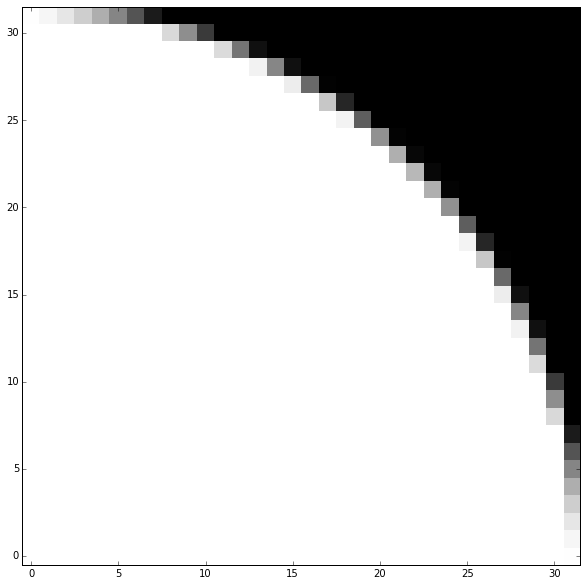

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(gray_FPM_quad)

In [15]:
gray_FPM.shape

(64, 64)

In [16]:
gray_FPM_quad.shape

(32, 32)

In [17]:
FPM_dir = os.path.abspath("../FPM")
if not os.path.exists(FPM_dir):
    os.mkdir(FPM_dir)
    print("created {:s} for FPM arrays".format(FPM_dir))
else:
    print("Destination {:s} already exists".format(FPM_dir))

Destination /Users/ntz/SCDA/FPM already exists


In [18]:
FPM_quart_fname = os.path.join(FPM_dir, "FPM_quart_occspot_M{:03d}.fits".format(M))
FPM_quart_hdu = fits.PrimaryHDU(gray_FPM_quad)
FPM_quart_hdu.writeto(FPM_quart_fname, clobber=True)

In [19]:
FPM_quart_dat_fname = os.path.join(FPM_dir, "FPM_quart_occspot_M{:03d}.dat".format(M))
np.savetxt(FPM_quart_dat_fname, gray_FPM_quad, fmt='%.6f', delimiter=" ")
print("Wrote binned, cropped FPM array to {0:s}".format(FPM_quart_dat_fname))

Wrote binned, cropped FPM array to /Users/ntz/SCDA/FPM/FPM_quart_occspot_M032.dat
